In [1]:
# import pandas as pd

# df_rna = pd.read_parquet("../data/miracle/Daten/2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet")
# df_radiomics = pd.read_parquet("../data/miracle/Daten/2025-05-16_RESTING_RADIO_contrast.parquet")
# df_clin = pd.read_parquet("../data/miracle/Daten/2025-05-16_RESTING_clinical.parquet")
# df_rna

In [2]:
# df_rna.index.intersection(df_radiomics.index).intersection(df_clin.index).shape

## Adapting Stackix to work with unpaired Miracle data

In [3]:
import autoencodix as acx
import os
from autoencodix.configs.stackix_config import StackixConfig
from autoencodix.configs.default_config import DataConfig, DataInfo, DataCase
os.chdir("..")
os.getcwd()


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/torch/cuda/__init__.py:619: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'/home/ewald/Github/autoencodix_package'

In [ ]:
import os

root_dir = os.path.join("data/miracle/Daten")
rna_file = "2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet"
clin_file = "2025-05-16_RESTING_clinical.parquet" # TODO test with non filtered version including nans -> funktioniert :) 
mut_file = "2025-05-16_RESTING_WES_MutMatrix.parquet"
radio_con = "2025-05-16_RESTING_RADIO_contrast.parquet"
cell_deco = "2025-05-26_RESTING_celldeco.parquet"
clin_file_nas = "2025-05-16_RESTING_clinical.parquet"

# rna_file = "2025-05-16_RESTING_RNA_log2TPM_gene_name.parquet"
# clin_file = "2025-05-16_RESTING_clinical_noNAs.parquet"
# mut_file = "2025-05-16_RESTING_WES_MutMatrix.parquet"
# radio_con = "2025-05-16_RESTING_RADIO_contrast.parquet"
# cell_deco = "2025-05-26_RESTING_celldeco.parquet"

# Create a dictionary of DataInfo objects
data_info = {
    "RNA": DataInfo(file_path=os.path.join(root_dir, rna_file)),
    "clinical": DataInfo(file_path=os.path.join(root_dir, clin_file), data_type="ANNOTATION"),
    # "mutation": DataInfo(file_path=os.path.join(root_dir, mut_file)),
    "radiology": DataInfo(file_path=os.path.join(root_dir, radio_con)),
    # "cell_deconvolution": DataInfo(file_path=os.path.join(root_dir, cell_deco))
}

config = StackixConfig(
    data_config=DataConfig(
        data_info=data_info
    ),
    data_case=DataCase.MULTI_BULK,
    requires_paired=False,
	# checkpoint_interval=1,
	k_filter=300,
	latent_dim=8,
	train_ratio=0.8,
	valid_ratio=0.1,
	test_ratio=0.1,
    epochs = 200
)

stackix = acx.Stackix(config=config)

In [5]:
stackix.run()

preprocessing


/home/ewald/Github/autoencodix_package/src/autoencodix/utils/_bulkreader.py:201: UserWarning: For data modality 'RNA', 9 sample(s) were found without a corresponding annotation and will be dropped: ['RESTING_062', 'RESTING_129', 'RESTING_140', 'RESTING_141', 'RESTING_146', 'RESTING_179', 'RESTING_185', 'RESTING_253', 'RESTING_318']
  warnings.warn(
/home/ewald/Github/autoencodix_package/src/autoencodix/data/_filter.py:96: UserWarning: WARNING: k is None or greater than number of columns, keeping all features.
  warnings.warn(


bulk_dfs keys in process_multi_bulk: dict_keys(['RNA', 'radiology'])
--- Running Pairing-Aware Split ---
Identified 56 fully paired samples across all modalities.
Identified 109 samples present in at least one, but not all, modalities.
Successfully generated synchronized indices for all modalities.
Using paired_ratio=0.34 (requested 0.5) for sampler with 44 paired and 87 unpaired samples
Using paired_ratio=0.35 (requested 0.5) for sampler with 6 paired and 11 unpaired samples
Using paired_ratio=0.35 (requested 0.5) for sampler with 6 paired and 11 unpaired samples
Training each modality model...
Training modality: RNA
Training modality: RNA
Epoch 1 - Train Loss: 23291.4419
Sub-losses: recon_loss: 23291.4399, var_loss: 0.0018, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 1 - Valid Loss: 2613.3333
Sub-losses: recon_loss: 2613.3333, var_loss: 0.0001, anneal_factor: 0.0000, effective_beta_factor: 0.0000
Epoch 2 - Train Loss: 22523.4883
Sub-losses: recon_loss: 22523.4858, var_

Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: VarixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x7aa9d37d0550>, valid=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x7aa9d2d9bc10>, test=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x7aa9d2d9bdf0>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 6 × 8
final_reconstruction:

Creating plots ...


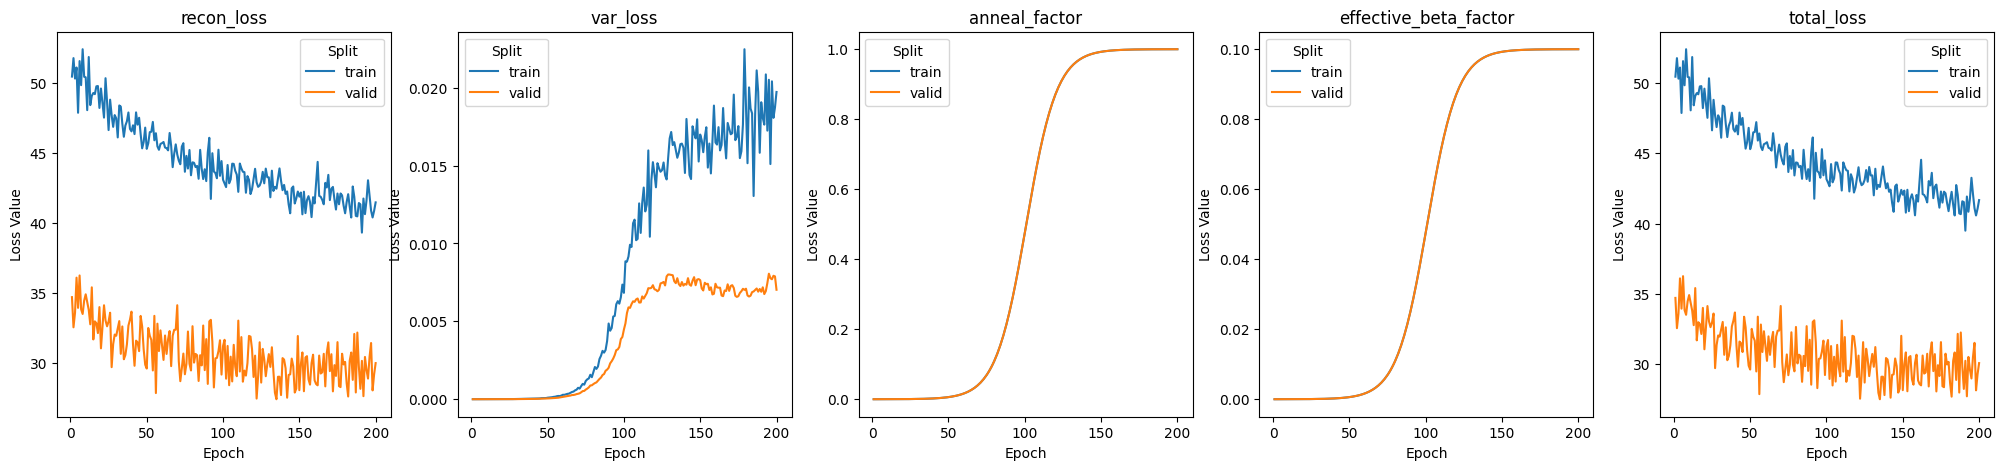

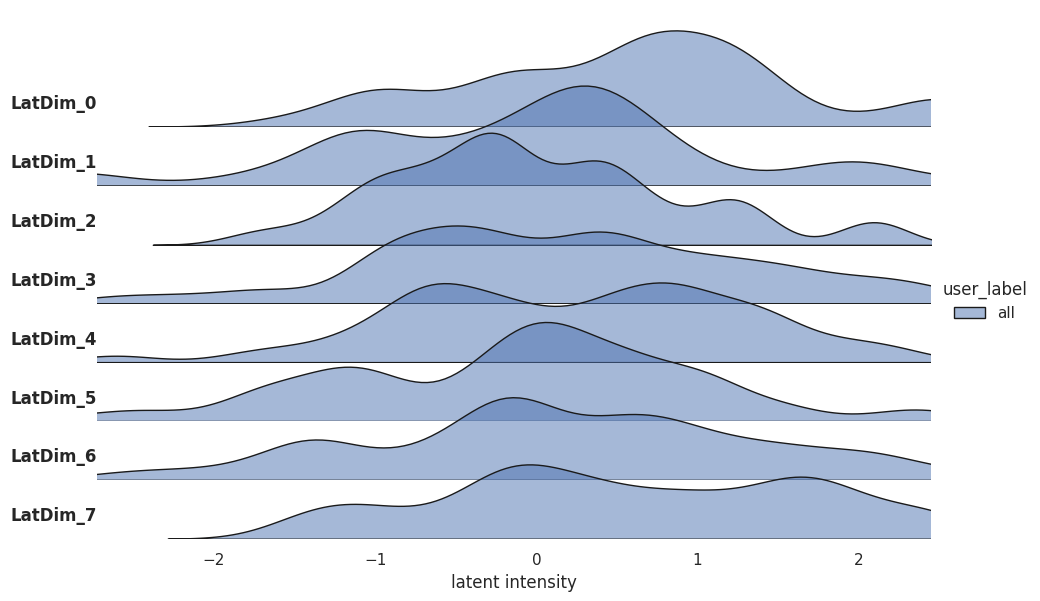

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


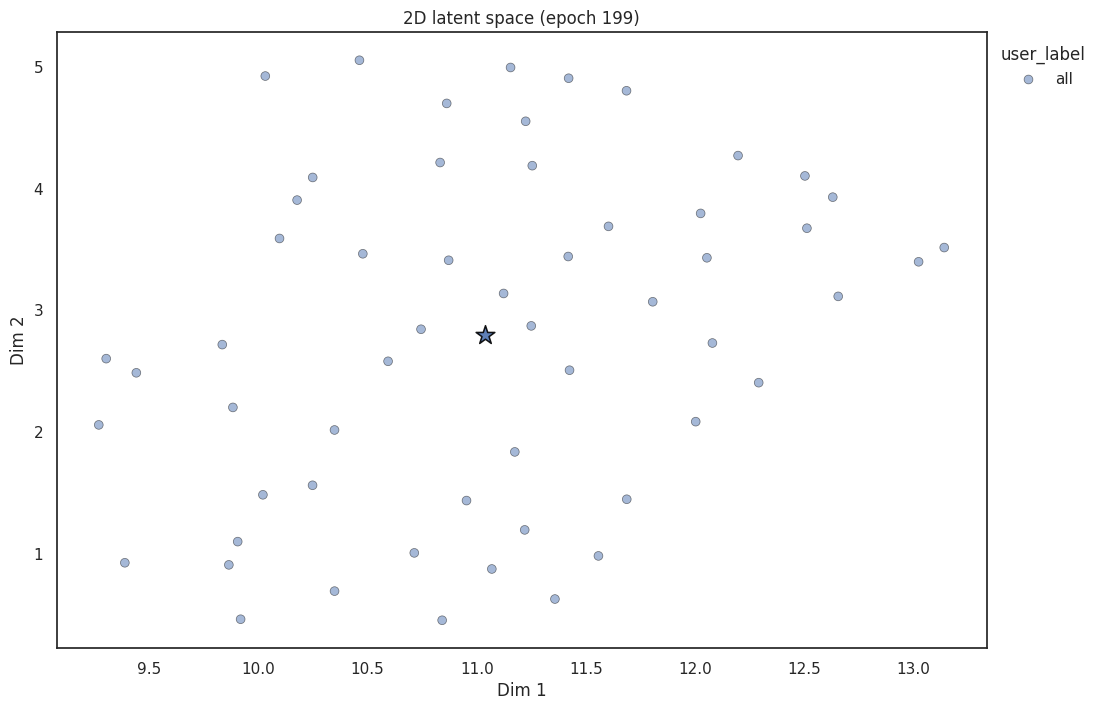

In [6]:
stackix.show_result()

In [7]:
stackix.result.datasets.train.datasets['RNA'].metadata

,AGE,SEX,SMOKING,ANYCOMO,CARDIOVASCULAR,DIABETES,CLIN_STAGE,ECOG,NCT,RESECTION_TYPE,...,HISTO,P_STAGE,GRADE,ADJ_CHEMO,ADJ_RT,OS_STATUS,DFS_STATUS,DFS_MONTHS,COHORT,DFS_STATUS_3Y
PATIENT_ID,,,,,,,,,,,,,,,,,,,,,
RESTING_002,73,Male,1.0,1.0,0.0,1.0,0.0,1.0,0.0,2,...,0,1,0.0,1.0,0.0,1.0,1,9.410000,RESTING,1
RESTING_003,58,Male,1.0,1.0,1.0,0.0,1.0,0.0,0.0,2,...,0,1,2.0,1.0,0.0,1.0,1,20.990000,RESTING,1
RESTING_004,75,Female,1.0,1.0,1.0,0.0,0.0,0.0,0.0,2,...,0,2,2.0,0.0,0.0,0.0,0,57.660000,RESTING,0
RESTING_005,72,Female,1.0,1.0,0.0,1.0,4.0,0.0,0.0,1,...,0,4,NaN,1.0,0.0,NaN,1,15.920000,RESTING,1
RESTING_008,67,Male,2.0,0.0,0.0,0.0,NaN,0.0,0.0,2,...,0,0,0.0,0.0,0.0,0.0,0,30.629999,RESTING,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RESTING_284,57,Male,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2,...,0,0,1.0,0.0,0.0,0.0,0,27.270000,RESTING,0
RESTING_285,71,Male,1.0,1.0,1.0,0.0,1.0,1.0,0.0,2,...,0,1,1.0,0.0,0.0,NaN,0,13.720000,RESTING,0
RESTING_295,69,Female,0.0,1.0,0.0,0.0,2.0,0.0,0.0,2,...,0,0,1.0,0.0,0.0,0.0,0,0.460000,RESTING,0


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


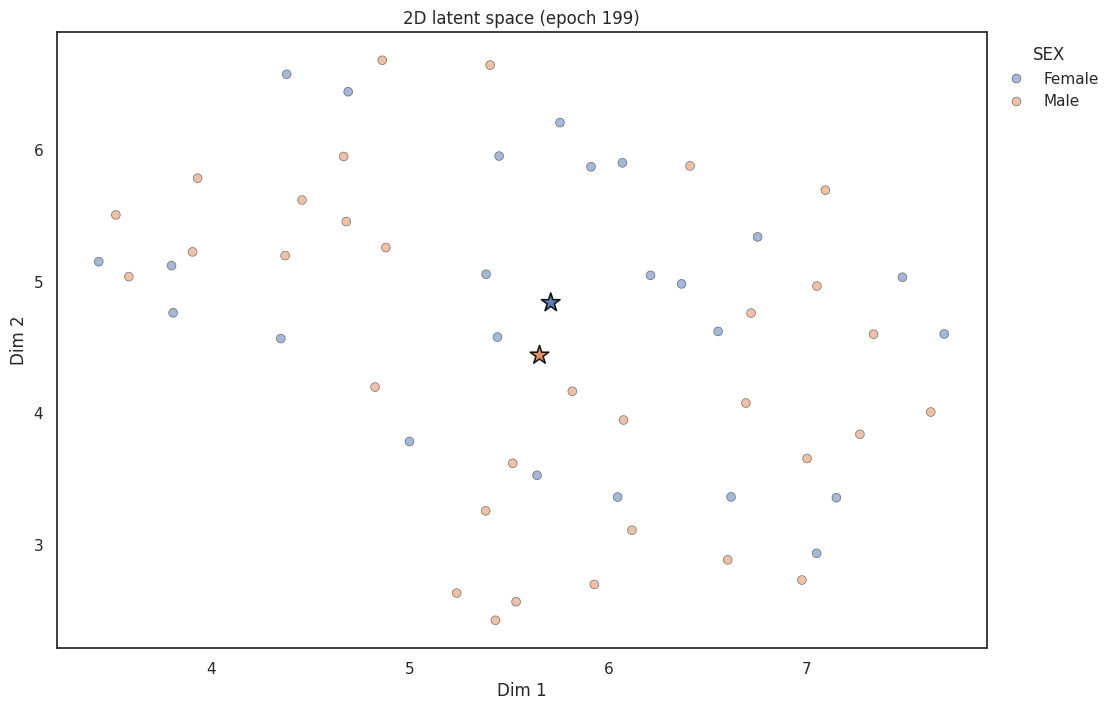

/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


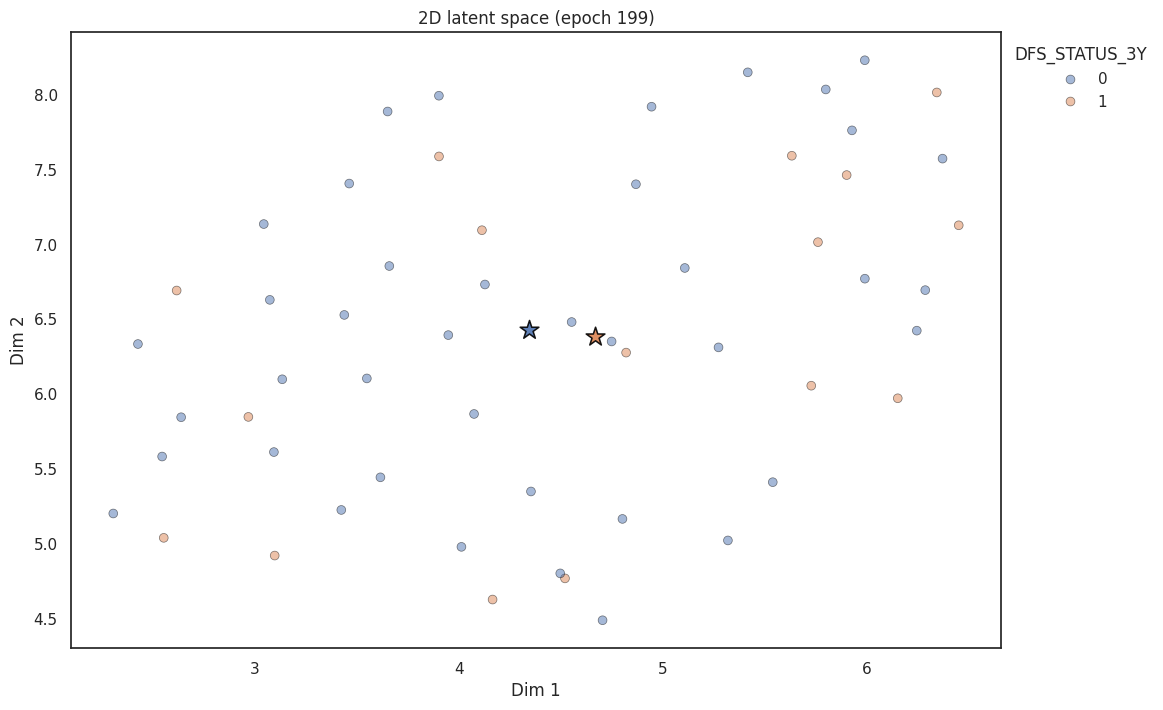

In [8]:
param_list = ['SEX', 'DFS_STATUS_3Y']

stackix._visualizer.show_latent_space(result=stackix.result, plot_type="2D-scatter", split='all', param=param_list)

In [9]:
## Evaluation
from sklearn import linear_model
sklearn_ml_class = linear_model.LogisticRegression(
							solver="sag",
							n_jobs=-1,
							class_weight="balanced",
							max_iter=200,
) ## Support of all sklearn-like models
sklearn_ml_regression = linear_model.LinearRegression()
own_metric_class = 'roc_auc_ovr'  ## sklearn name of metrics: https://scikit-learn.org/stable/modules/model_evaluation.html#string-name-scorers
own_metric_regression = 'r2' 

stackix.evaluate(
	ml_model_class=sklearn_ml_class, # Default is sklearn LogisticRegression
	ml_model_regression=sklearn_ml_regression, # Default is sklearn LinearRegression
	params= param_list,	# No default? ... or all params in annotation?
	metric_class = own_metric_class, # Default is 'roc_auc_ovr'
	metric_regression = own_metric_regression, # Default is 'r2'
	reference_methods = ["PCA", "UMAP", "RandomFeature"], # Default [], no references? or all possible? or only PCA?
	split_type = "use-split", # Default is "use-split", other options: "CV-5", ... "LOOCV"?

)


Perform ML task with feature df: PCA
PCA
Perform ML task with feature df: UMAP
UMAP


/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ewald/Github/autoencodix_package/.venv/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was

Perform ML task with feature df: RandomFeature
RandomFeature_R1
RandomFeature_R2
RandomFeature_R3
RandomFeature_R4
RandomFeature_R5
Perform ML task with feature df: Latent
Latent
Perform ML task for target parameter: SEX
Perform ML task for target parameter: DFS_STATUS_3Y


Result Object Public Attributes:
------------------------------
latentspaces: TrainingDynamics object
sample_ids: TrainingDynamics object
reconstructions: TrainingDynamics object
mus: TrainingDynamics object
sigmas: TrainingDynamics object
losses: TrainingDynamics object
sub_losses: LossRegistry(_losses={'recon_loss': TrainingDynamics(), 'var_loss': TrainingDynamics(), 'anneal_factor': TrainingDynamics(), 'effective_beta_factor': TrainingDynamics()})
preprocessed_data: Tensor of shape (0,)
model: VarixArchitecture
model_checkpoints: TrainingDynamics object
datasets: DatasetContainer(train=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x7aa9d37d0550>, valid=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x7aa9d2d9bc10>, test=<autoencodix.data._multimodal_dataset.MultiModalDataset object at 0x7aa9d2d9bdf0>)
new_datasets: DatasetContainer(train=None, valid=None, test=None)
adata_latent: AnnData object with n_obs × n_vars = 6 × 8
final_reconstruction:

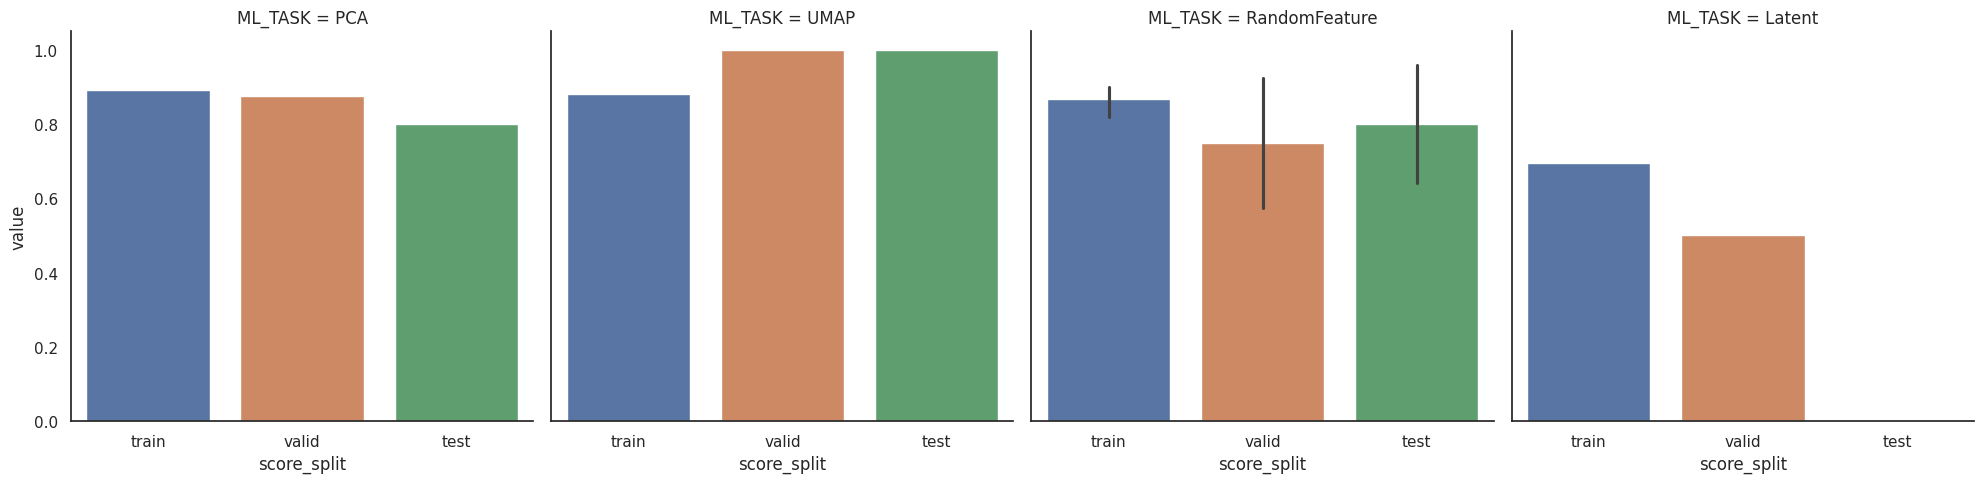

In [14]:
# barplot of evaluation results
stackix._visualizer.show_evaluation(
	param = param_list[1], # Plot one parameter
	metric = own_metric_class, 
	ml_alg=str(sklearn_ml_class), # Call via string of ML method
)

In [11]:
stackix._datasets.train.paired_sample_ids

['RESTING_002',
 'RESTING_005',
 'RESTING_008',
 'RESTING_012',
 'RESTING_013',
 'RESTING_014',
 'RESTING_018',
 'RESTING_026',
 'RESTING_030',
 'RESTING_038',
 'RESTING_042',
 'RESTING_047',
 'RESTING_049',
 'RESTING_067',
 'RESTING_087',
 'RESTING_088',
 'RESTING_091',
 'RESTING_092',
 'RESTING_094',
 'RESTING_097',
 'RESTING_100',
 'RESTING_112',
 'RESTING_114',
 'RESTING_116',
 'RESTING_117',
 'RESTING_126',
 'RESTING_138',
 'RESTING_147',
 'RESTING_149',
 'RESTING_152',
 'RESTING_168',
 'RESTING_173',
 'RESTING_187',
 'RESTING_193',
 'RESTING_211',
 'RESTING_226',
 'RESTING_235',
 'RESTING_237',
 'RESTING_251',
 'RESTING_271',
 'RESTING_278',
 'RESTING_280',
 'RESTING_296',
 'RESTING_299']

In [ ]:
# xmodalix = acx.XModalix(config=config)

In [ ]:
results = stackix._trainer._orchestrator.modality_results

In [ ]:
results["RNA"].sample_ids.get(epoch=-1, split="train")

array(['RESTING_003', 'RESTING_004', 'RESTING_017', 'RESTING_019',
       'RESTING_020', 'RESTING_021', 'RESTING_024', 'RESTING_026',
       'RESTING_034', 'RESTING_039', 'RESTING_042', 'RESTING_044',
       'RESTING_045', 'RESTING_046', 'RESTING_048', 'RESTING_049',
       'RESTING_051', 'RESTING_052', 'RESTING_053', 'RESTING_054',
       'RESTING_056', 'RESTING_057', 'RESTING_058', 'RESTING_061',
       'RESTING_075', 'RESTING_080', 'RESTING_087', 'RESTING_088',
       'RESTING_094', 'RESTING_097', 'RESTING_098', 'RESTING_100',
       'RESTING_101', 'RESTING_109', 'RESTING_111', 'RESTING_113',
       'RESTING_115', 'RESTING_116', 'RESTING_117', 'RESTING_121',
       'RESTING_123', 'RESTING_130', 'RESTING_131', 'RESTING_133',
       'RESTING_135', 'RESTING_138', 'RESTING_139', 'RESTING_142',
       'RESTING_152', 'RESTING_154', 'RESTING_157', 'RESTING_160',
       'RESTING_161', 'RESTING_163', 'RESTING_164', 'RESTING_168',
       'RESTING_169', 'RESTING_173', 'RESTING_178', 'RESTING_1

In [ ]:
# xmodalix.run()

In [ ]:

# os.getcwd()